### 1. Import the necessary libs

In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from prophet import Prophet
import sys
import os

### 2. Load the dataframes one by one

In [ ]:
#path is set to current working directory
local_path = os.getcwd()

print(f"Working directory: {local_path}")
path_of_files = local_path + "/processed"
print(f"Path of files: {path_of_files}")
def load_dataFrames():
    csv_files = [file for file in os.listdir(path_of_files) if file.endswith(".csv") and os.path.isfile(os.path.join(path_of_files, file))]
    ## from the previous data preperation part we have seen that pyspark is actually not a good idea to use when we have pandas so I will directly take them as pandas DataFrames.
    pd_dfs = {}
    for file in csv_files:
        file_path = os.path.join(path_of_files, file)
        file_name = os.path.splitext(file)[0]
        pd_dfs[file_name] = pd.read_csv(file_path)
    return pd_dfs
pd_dfs = load_dataFrames()

Working directory: /Users/yusufsurmen/Currency-Forecast-Webpage
Path of files: /Users/yusufsurmen/Currency-Forecast-Webpage/processed


### 3. Run the base prophet model to try the model

Fitting Prophet model for GBPUSD_M1_processed...


00:26:15 - cmdstanpy - INFO - Chain [1] start processing
00:26:53 - cmdstanpy - INFO - Chain [1] done processing


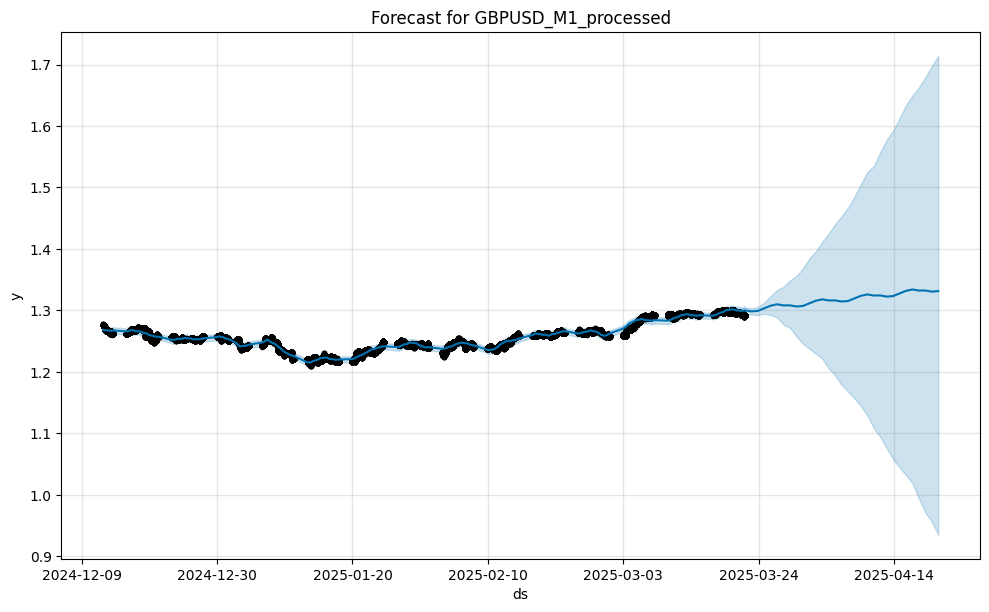

  0%|          | 0/7 [00:00<?, ?it/s]00:27:00 - cmdstanpy - INFO - Chain [1] start processing
00:27:11 - cmdstanpy - INFO - Chain [1] done processing
 14%|█▍        | 1/7 [00:12<01:16, 12.75s/it]00:27:13 - cmdstanpy - INFO - Chain [1] start processing
00:27:29 - cmdstanpy - INFO - Chain [1] done processing
 29%|██▊       | 2/7 [00:30<01:18, 15.74s/it]00:27:31 - cmdstanpy - INFO - Chain [1] start processing
00:27:48 - cmdstanpy - INFO - Chain [1] done processing
 43%|████▎     | 3/7 [00:49<01:08, 17.12s/it]00:27:50 - cmdstanpy - INFO - Chain [1] start processing
00:28:12 - cmdstanpy - INFO - Chain [1] done processing
 57%|█████▋    | 4/7 [01:14<01:00, 20.13s/it]00:28:15 - cmdstanpy - INFO - Chain [1] start processing
00:28:48 - cmdstanpy - INFO - Chain [1] done processing
 71%|███████▏  | 5/7 [01:49<00:51, 25.51s/it]00:28:50 - cmdstanpy - INFO - Chain [1] start processing
00:29:25 - cmdstanpy - INFO - Chain [1] done processing
 86%|████████▌ | 6/7 [02:26<00:29, 29.70s/it]00:29:28 - cmds

               horizon       mse      rmse       mae      mape     mdape  \
0      1 days 00:03:00  0.000026  0.005083  0.004303  0.003441  0.003018   
1      1 days 00:04:00  0.000026  0.005085  0.004305  0.003442  0.003019   
2      1 days 00:05:00  0.000026  0.005087  0.004306  0.003444  0.003019   
3      1 days 00:06:00  0.000026  0.005089  0.004307  0.003444  0.003019   
4      1 days 00:07:00  0.000026  0.005090  0.004308  0.003445  0.003021   
...                ...       ...       ...       ...       ...       ...   
12952  9 days 23:56:00  0.002599  0.050982  0.031859  0.025640  0.014752   
12953  9 days 23:57:00  0.002601  0.051004  0.031874  0.025652  0.014756   
12954  9 days 23:58:00  0.002604  0.051027  0.031891  0.025666  0.014758   
12955  9 days 23:59:00  0.002606  0.051049  0.031905  0.025678  0.014758   
12956 10 days 00:00:00  0.002608  0.051071  0.031920  0.025690  0.014760   

          smape  coverage  
0      0.003435  0.576335  
1      0.003436  0.576481  
2  

00:30:27 - cmdstanpy - INFO - Chain [1] start processing
00:31:11 - cmdstanpy - INFO - Chain [1] done processing


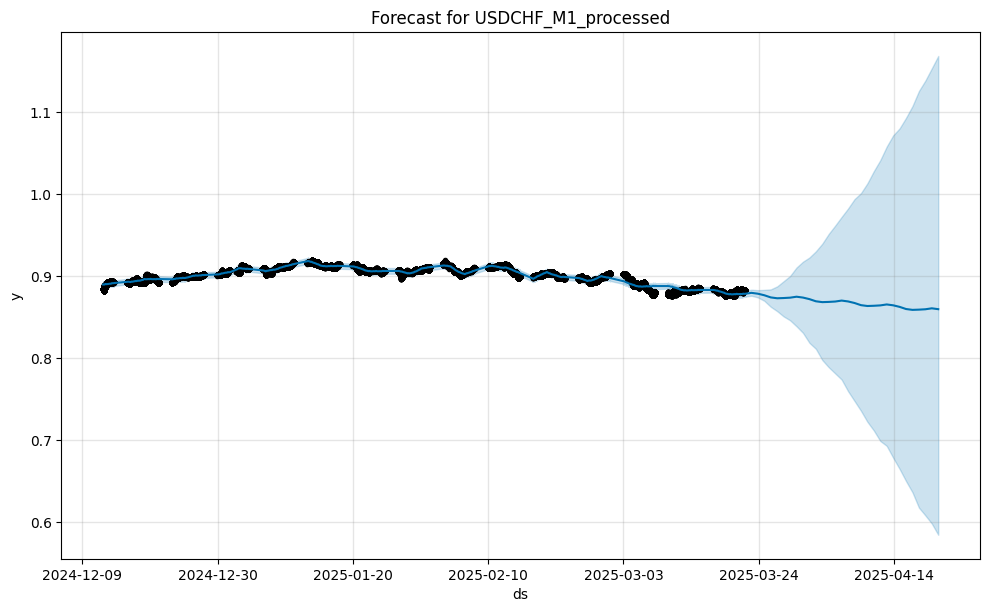

  0%|          | 0/7 [00:00<?, ?it/s]00:31:18 - cmdstanpy - INFO - Chain [1] start processing
00:31:29 - cmdstanpy - INFO - Chain [1] done processing
 14%|█▍        | 1/7 [00:12<01:17, 12.97s/it]00:31:31 - cmdstanpy - INFO - Chain [1] start processing
00:31:45 - cmdstanpy - INFO - Chain [1] done processing
 29%|██▊       | 2/7 [00:28<01:13, 14.64s/it]00:31:47 - cmdstanpy - INFO - Chain [1] start processing
00:32:06 - cmdstanpy - INFO - Chain [1] done processing
 43%|████▎     | 3/7 [00:49<01:09, 17.34s/it]00:32:07 - cmdstanpy - INFO - Chain [1] start processing
00:32:33 - cmdstanpy - INFO - Chain [1] done processing
 57%|█████▋    | 4/7 [01:16<01:03, 21.27s/it]00:32:35 - cmdstanpy - INFO - Chain [1] start processing
00:33:09 - cmdstanpy - INFO - Chain [1] done processing
 71%|███████▏  | 5/7 [01:52<00:53, 26.68s/it]00:33:11 - cmdstanpy - INFO - Chain [1] start processing
00:33:32 - cmdstanpy - INFO - Chain [1] done processing
 86%|████████▌ | 6/7 [02:15<00:25, 25.38s/it]00:33:34 - cmds

               horizon       mse      rmse       mae      mape     mdape  \
0      0 days 23:37:00  0.000007  0.002725  0.002373  0.002632  0.002772   
1      0 days 23:38:00  0.000007  0.002725  0.002373  0.002631  0.002772   
2      0 days 23:39:00  0.000007  0.002725  0.002373  0.002631  0.002772   
3      0 days 23:40:00  0.000007  0.002724  0.002373  0.002631  0.002772   
4      0 days 23:41:00  0.000007  0.002724  0.002373  0.002631  0.002772   
...                ...       ...       ...       ...       ...       ...   
12968  9 days 23:56:00  0.000763  0.027621  0.018291  0.020254  0.012315   
12969  9 days 23:57:00  0.000764  0.027635  0.018300  0.020264  0.012315   
12970  9 days 23:58:00  0.000764  0.027648  0.018309  0.020274  0.012315   
12971  9 days 23:59:00  0.000765  0.027662  0.018318  0.020284  0.012312   
12972 10 days 00:00:00  0.000766  0.027676  0.018328  0.020294  0.012315   

          smape  coverage  
0      0.002635  0.672852  
1      0.002634  0.673060  
2  

00:34:32 - cmdstanpy - INFO - Chain [1] start processing
00:34:59 - cmdstanpy - INFO - Chain [1] done processing


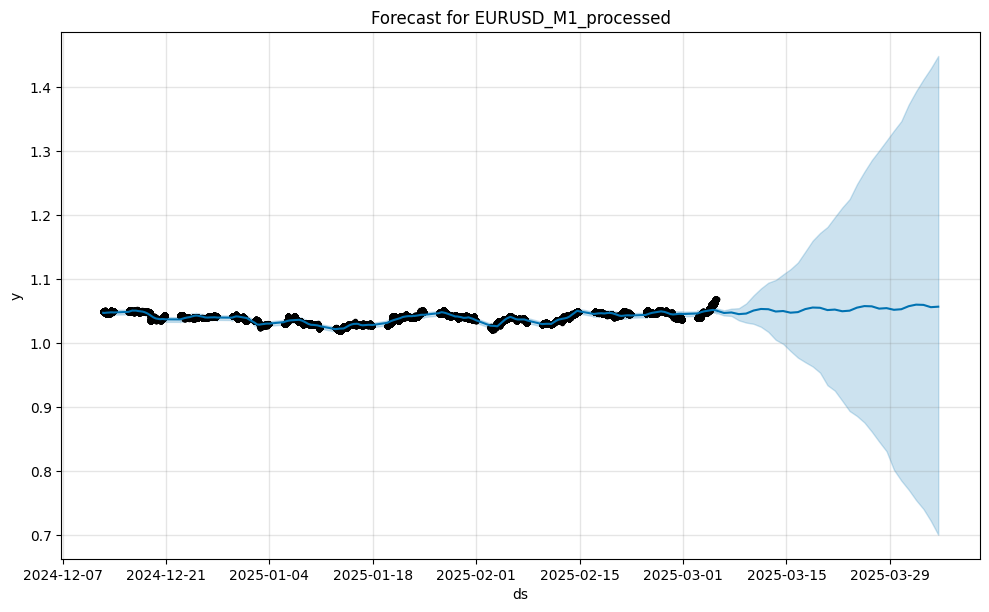

  0%|          | 0/6 [00:00<?, ?it/s]00:35:05 - cmdstanpy - INFO - Chain [1] start processing
00:35:15 - cmdstanpy - INFO - Chain [1] done processing
 17%|█▋        | 1/6 [00:11<00:56, 11.33s/it]00:35:16 - cmdstanpy - INFO - Chain [1] start processing
00:35:29 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 2/6 [00:26<00:53, 13.40s/it]00:35:31 - cmdstanpy - INFO - Chain [1] start processing
00:35:51 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 3/6 [00:47<00:51, 17.21s/it]00:35:53 - cmdstanpy - INFO - Chain [1] start processing
00:36:09 - cmdstanpy - INFO - Chain [1] done processing
 67%|██████▋   | 4/6 [01:06<00:35, 17.59s/it]00:36:11 - cmdstanpy - INFO - Chain [1] start processing
00:36:41 - cmdstanpy - INFO - Chain [1] done processing
 83%|████████▎ | 5/6 [01:37<00:22, 22.58s/it]00:36:43 - cmdstanpy - INFO - Chain [1] start processing
00:37:07 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 6/6 [02:03<00:00, 20.65s/it]


               horizon       mse      rmse       mae      mape     mdape  \
0      1 days 01:55:00  0.000030  0.005504  0.004693  0.004515  0.004448   
1      1 days 01:56:00  0.000030  0.005507  0.004696  0.004518  0.004452   
2      1 days 01:57:00  0.000030  0.005510  0.004699  0.004520  0.004458   
3      1 days 01:58:00  0.000030  0.005512  0.004701  0.004523  0.004462   
4      1 days 01:59:00  0.000030  0.005516  0.004705  0.004527  0.004463   
...                ...       ...       ...       ...       ...       ...   
12840  9 days 23:56:00  0.000642  0.025339  0.021879  0.021129  0.020179   
12841  9 days 23:57:00  0.000642  0.025343  0.021883  0.021133  0.020183   
12842  9 days 23:58:00  0.000642  0.025347  0.021887  0.021136  0.020186   
12843  9 days 23:59:00  0.000643  0.025351  0.021891  0.021140  0.020212   
12844 10 days 00:00:00  0.000643  0.025354  0.021893  0.021142  0.020234   

          smape  coverage  
0      0.004526  0.370243  
1      0.004529  0.369898  
2  

00:37:26 - cmdstanpy - INFO - Chain [1] start processing
00:38:05 - cmdstanpy - INFO - Chain [1] done processing


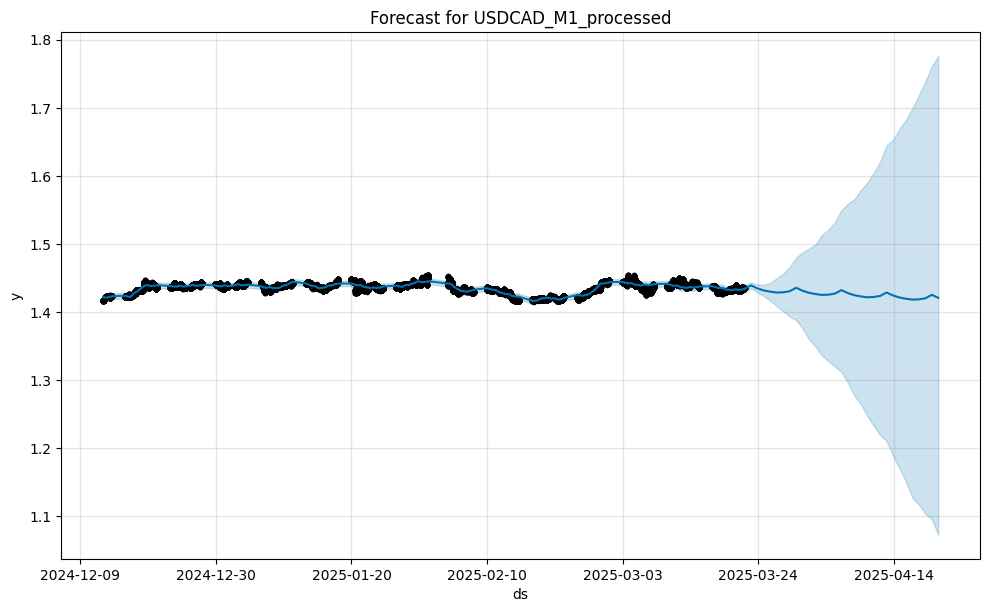

  0%|          | 0/7 [00:00<?, ?it/s]00:38:12 - cmdstanpy - INFO - Chain [1] start processing
00:38:25 - cmdstanpy - INFO - Chain [1] done processing
 14%|█▍        | 1/7 [00:14<01:24, 14.14s/it]00:38:26 - cmdstanpy - INFO - Chain [1] start processing
00:38:38 - cmdstanpy - INFO - Chain [1] done processing
 29%|██▊       | 2/7 [00:27<01:09, 13.90s/it]00:38:40 - cmdstanpy - INFO - Chain [1] start processing
00:38:58 - cmdstanpy - INFO - Chain [1] done processing
 43%|████▎     | 3/7 [00:47<01:06, 16.62s/it]00:39:00 - cmdstanpy - INFO - Chain [1] start processing
00:39:21 - cmdstanpy - INFO - Chain [1] done processing
 57%|█████▋    | 4/7 [01:10<00:57, 19.18s/it]00:39:23 - cmdstanpy - INFO - Chain [1] start processing
00:39:53 - cmdstanpy - INFO - Chain [1] done processing
 71%|███████▏  | 5/7 [01:42<00:47, 23.62s/it]00:39:55 - cmdstanpy - INFO - Chain [1] start processing
00:40:17 - cmdstanpy - INFO - Chain [1] done processing
 86%|████████▌ | 6/7 [02:07<00:24, 24.03s/it]00:40:20 - cmds

               horizon       mse      rmse       mae      mape     mdape  \
0      0 days 23:39:00  0.000040  0.006312  0.005676  0.003953  0.004547   
1      0 days 23:40:00  0.000040  0.006312  0.005677  0.003953  0.004545   
2      0 days 23:41:00  0.000040  0.006313  0.005678  0.003954  0.004547   
3      0 days 23:42:00  0.000040  0.006313  0.005679  0.003955  0.004547   
4      0 days 23:43:00  0.000040  0.006314  0.005680  0.003955  0.004547   
...                ...       ...       ...       ...       ...       ...   
12970  9 days 23:56:00  0.000156  0.012484  0.009879  0.006886  0.005180   
12971  9 days 23:57:00  0.000156  0.012477  0.009878  0.006885  0.005181   
12972  9 days 23:58:00  0.000156  0.012470  0.009876  0.006884  0.005182   
12973  9 days 23:59:00  0.000155  0.012466  0.009875  0.006883  0.005182   
12974 10 days 00:00:00  0.000155  0.012457  0.009873  0.006882  0.005182   

          smape  coverage  
0      0.003960  0.256777  
1      0.003961  0.256732  
2  

In [8]:
# we will first try the very beginner prophet model with close as the y and date as the ds parameter.
from prophet.diagnostics import cross_validation, performance_metrics

for name, file in pd_dfs.items():
    if 'Time' in file.columns:
        df_prophet = pd.DataFrame({
            'ds': pd.to_datetime(file["Time"]),
            'y': file["Close"]
        })

        print(f"Fitting Prophet model for {name}...")
        model = Prophet()
        model.fit(df_prophet)

        future = model.make_future_dataframe(periods=30)
        forecast = model.predict(future)
        
        fig = model.plot(forecast)
        plt.title(f"Forecast for {name}")
        plt.show()

        df_cross = cross_validation(model=model, initial='20 days', period='10 days', horizon='10 days')
        df_performance = performance_metrics(df_cross)

        print(df_performance)

        print(f"MAPE: {df_performance['mape'].mean()}")
    else:
        print(f"Error: No date column found in {name} dataset")

### 3A. Detailed test of the model to see if it is overfitting or not. 


PROPHET ANALYSIS FOR GBPUSD_M1_processed
Data points: 95481
Total days span: 99
Date range: 2024-12-12 to 2025-03-21

Fitting Prophet model...


00:41:08 - cmdstanpy - INFO - Chain [1] start processing
00:41:50 - cmdstanpy - INFO - Chain [1] done processing


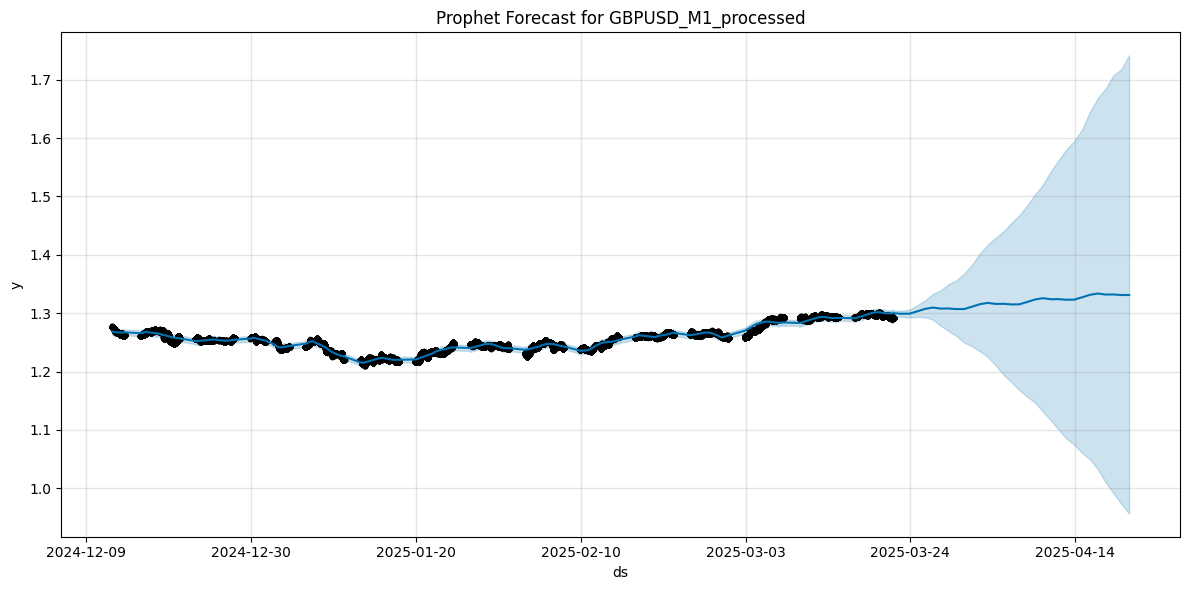


--- CROSS-VALIDATION RESULTS ---

Short Dataset - Easy:
  Setup: initial=20 days, period=7 days, horizon=7 days


  0%|          | 0/11 [00:00<?, ?it/s]00:41:57 - cmdstanpy - INFO - Chain [1] start processing
00:42:04 - cmdstanpy - INFO - Chain [1] done processing
  9%|▉         | 1/11 [00:08<01:21,  8.12s/it]00:42:05 - cmdstanpy - INFO - Chain [1] start processing
00:42:14 - cmdstanpy - INFO - Chain [1] done processing
 18%|█▊        | 2/11 [00:17<01:21,  9.06s/it]00:42:15 - cmdstanpy - INFO - Chain [1] start processing
00:42:23 - cmdstanpy - INFO - Chain [1] done processing
 27%|██▋       | 3/11 [00:27<01:13,  9.19s/it]00:42:24 - cmdstanpy - INFO - Chain [1] start processing
00:42:44 - cmdstanpy - INFO - Chain [1] done processing
 36%|███▋      | 4/11 [00:48<01:36, 13.83s/it]00:42:45 - cmdstanpy - INFO - Chain [1] start processing
00:42:58 - cmdstanpy - INFO - Chain [1] done processing
 45%|████▌     | 5/11 [01:01<01:22, 13.76s/it]00:42:59 - cmdstanpy - INFO - Chain [1] start processing
00:43:18 - cmdstanpy - INFO - Chain [1] done processing
 55%|█████▍    | 6/11 [01:22<01:20, 16.07s/it]00:43:20

  MAPE: 0.0100 (1.00%)
  SMAPE: 0.0100
  Coverage: 0.752
  💭 Very low error on easy test - check harder tests

Short Dataset - Harder:
  Setup: initial=30 days, period=10 days, horizon=15 days


  0%|          | 0/6 [00:00<?, ?it/s]00:45:46 - cmdstanpy - INFO - Chain [1] start processing
00:45:59 - cmdstanpy - INFO - Chain [1] done processing
 17%|█▋        | 1/6 [00:15<01:15, 15.04s/it]00:46:01 - cmdstanpy - INFO - Chain [1] start processing
00:46:16 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 2/6 [00:31<01:03, 15.83s/it]00:46:17 - cmdstanpy - INFO - Chain [1] start processing
00:46:33 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 3/6 [00:48<00:49, 16.47s/it]00:46:35 - cmdstanpy - INFO - Chain [1] start processing
00:46:56 - cmdstanpy - INFO - Chain [1] done processing
 67%|██████▋   | 4/6 [01:11<00:38, 19.16s/it]00:46:58 - cmdstanpy - INFO - Chain [1] start processing
00:47:28 - cmdstanpy - INFO - Chain [1] done processing
 83%|████████▎ | 5/6 [01:43<00:23, 23.78s/it]00:47:30 - cmdstanpy - INFO - Chain [1] start processing
00:47:58 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 6/6 [02:13<00:00, 22.30s/it]


  MAPE: 0.0113 (1.13%)
  SMAPE: 0.0114
  Coverage: 0.909
  ✅ Excellent performance on challenging test!

--- OVERFITTING CHECK ---
Performance degradation ratio: 1.14
✅ GOOD generalization - consistent performance

--- RECOMMENDATIONS FOR GBPUSD_M1_processed ---
📅 Moderate data (99 days) - reasonable for basic forecasting
💡 More data would allow for more rigorous testing

PROPHET ANALYSIS FOR USDCHF_M1_processed
Data points: 94239
Total days span: 99
Date range: 2024-12-12 to 2025-03-21

Fitting Prophet model...


00:48:36 - cmdstanpy - INFO - Chain [1] start processing
00:49:13 - cmdstanpy - INFO - Chain [1] done processing


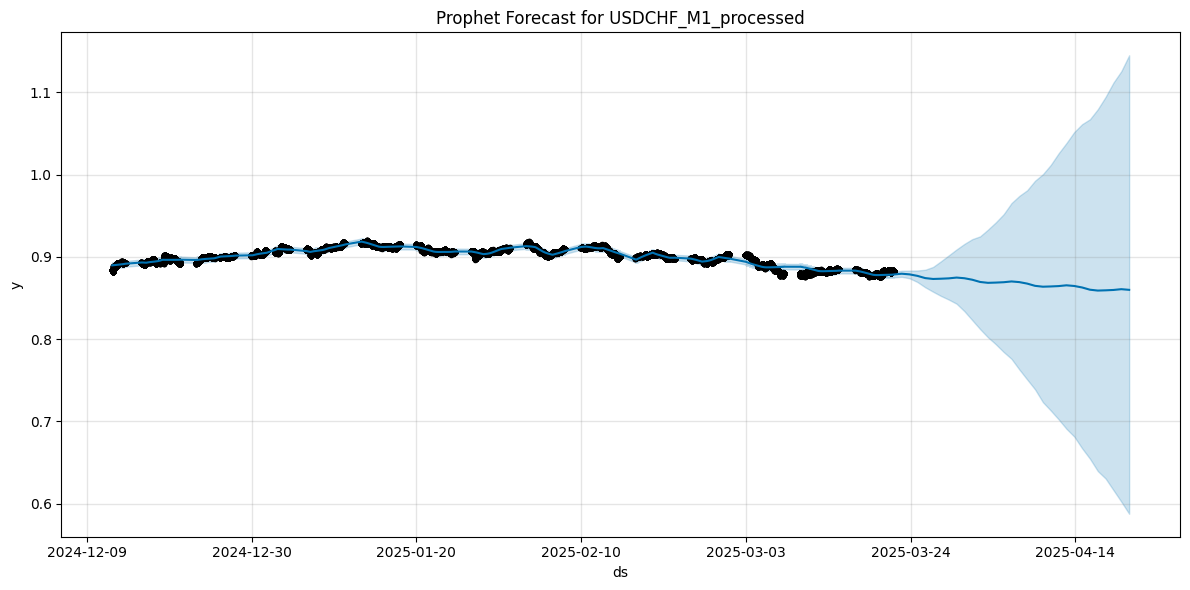


--- CROSS-VALIDATION RESULTS ---

Short Dataset - Easy:
  Setup: initial=20 days, period=7 days, horizon=7 days


  0%|          | 0/11 [00:00<?, ?it/s]00:49:20 - cmdstanpy - INFO - Chain [1] start processing
00:49:28 - cmdstanpy - INFO - Chain [1] done processing
  9%|▉         | 1/11 [00:09<01:34,  9.50s/it]00:49:29 - cmdstanpy - INFO - Chain [1] start processing
00:49:38 - cmdstanpy - INFO - Chain [1] done processing
 18%|█▊        | 2/11 [00:19<01:27,  9.76s/it]00:49:39 - cmdstanpy - INFO - Chain [1] start processing
00:49:53 - cmdstanpy - INFO - Chain [1] done processing
 27%|██▋       | 3/11 [00:34<01:36, 12.07s/it]00:49:54 - cmdstanpy - INFO - Chain [1] start processing
00:50:07 - cmdstanpy - INFO - Chain [1] done processing
 36%|███▋      | 4/11 [00:48<01:30, 12.98s/it]00:50:08 - cmdstanpy - INFO - Chain [1] start processing
00:50:27 - cmdstanpy - INFO - Chain [1] done processing
 45%|████▌     | 5/11 [01:08<01:31, 15.31s/it]00:50:28 - cmdstanpy - INFO - Chain [1] start processing
00:50:51 - cmdstanpy - INFO - Chain [1] done processing
 55%|█████▍    | 6/11 [01:32<01:31, 18.29s/it]00:50:52

  MAPE: 0.0096 (0.96%)
  SMAPE: 0.0096
  Coverage: 0.781
  💭 Very low error on easy test - check harder tests

Short Dataset - Harder:
  Setup: initial=30 days, period=10 days, horizon=15 days


  0%|          | 0/6 [00:00<?, ?it/s]00:53:24 - cmdstanpy - INFO - Chain [1] start processing
00:53:37 - cmdstanpy - INFO - Chain [1] done processing
 17%|█▋        | 1/6 [00:14<01:13, 14.79s/it]00:53:39 - cmdstanpy - INFO - Chain [1] start processing
00:53:56 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 2/6 [00:33<01:08, 17.01s/it]00:53:57 - cmdstanpy - INFO - Chain [1] start processing
00:55:27 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 3/6 [02:05<02:33, 51.17s/it]00:55:29 - cmdstanpy - INFO - Chain [1] start processing
00:55:44 - cmdstanpy - INFO - Chain [1] done processing
 67%|██████▋   | 4/6 [02:22<01:15, 37.65s/it]00:55:46 - cmdstanpy - INFO - Chain [1] start processing
00:56:15 - cmdstanpy - INFO - Chain [1] done processing
 83%|████████▎ | 5/6 [02:52<00:35, 35.11s/it]00:56:17 - cmdstanpy - INFO - Chain [1] start processing
00:56:41 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 6/6 [03:18<00:00, 33.10s/it]


  MAPE: 0.0091 (0.91%)
  SMAPE: 0.0091
  Coverage: 0.895
  ✅ Excellent performance on challenging test!

--- OVERFITTING CHECK ---
Performance degradation ratio: 0.95
✅ GOOD generalization - consistent performance

--- RECOMMENDATIONS FOR USDCHF_M1_processed ---
📅 Moderate data (99 days) - reasonable for basic forecasting
💡 More data would allow for more rigorous testing

PROPHET ANALYSIS FOR EURUSD_M1_processed
Data points: 77573
Total days span: 83
Date range: 2024-12-12 to 2025-03-05

Fitting Prophet model...


00:57:17 - cmdstanpy - INFO - Chain [1] start processing
00:59:57 - cmdstanpy - INFO - Chain [1] done processing


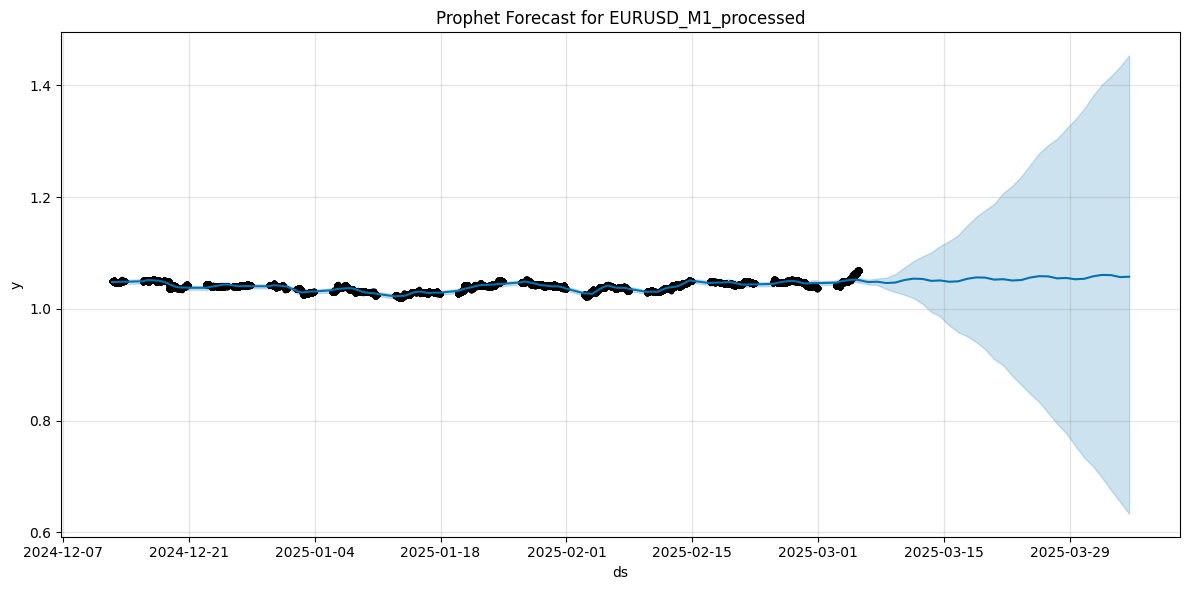


--- CROSS-VALIDATION RESULTS ---

Short Dataset - Easy:
  Setup: initial=20 days, period=7 days, horizon=7 days


  0%|          | 0/9 [00:00<?, ?it/s]01:00:02 - cmdstanpy - INFO - Chain [1] start processing
01:00:09 - cmdstanpy - INFO - Chain [1] done processing
 11%|█         | 1/9 [00:07<00:56,  7.05s/it]01:00:09 - cmdstanpy - INFO - Chain [1] start processing
01:00:16 - cmdstanpy - INFO - Chain [1] done processing
 22%|██▏       | 2/9 [00:14<00:50,  7.16s/it]01:00:17 - cmdstanpy - INFO - Chain [1] start processing
01:00:30 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 3/9 [00:28<01:02, 10.34s/it]01:00:31 - cmdstanpy - INFO - Chain [1] start processing
01:00:41 - cmdstanpy - INFO - Chain [1] done processing
 44%|████▍     | 4/9 [00:39<00:53, 10.76s/it]01:00:42 - cmdstanpy - INFO - Chain [1] start processing
01:01:01 - cmdstanpy - INFO - Chain [1] done processing
 56%|█████▌    | 5/9 [00:59<00:55, 13.95s/it]01:01:02 - cmdstanpy - INFO - Chain [1] start processing
01:01:19 - cmdstanpy - INFO - Chain [1] done processing
 67%|██████▋   | 6/9 [01:17<00:46, 15.43s/it]01:01:21 - cmds

  MAPE: 0.0095 (0.95%)
  SMAPE: 0.0096
  Coverage: 0.851
  💭 Very low error on easy test - check harder tests

Short Dataset - Harder:
  Setup: initial=30 days, period=10 days, horizon=15 days


  0%|          | 0/4 [00:00<?, ?it/s]01:02:47 - cmdstanpy - INFO - Chain [1] start processing
01:02:59 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 1/4 [00:13<00:41, 13.70s/it]01:03:01 - cmdstanpy - INFO - Chain [1] start processing
01:08:34 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 2/4 [05:49<06:45, 202.96s/it]01:08:36 - cmdstanpy - INFO - Chain [1] start processing
01:08:54 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 3/4 [06:08<01:59, 119.05s/it]01:08:56 - cmdstanpy - INFO - Chain [1] start processing
01:09:17 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 4/4 [06:31<00:00, 97.90s/it] 


  MAPE: 0.0100 (1.00%)
  SMAPE: 0.0100
  Coverage: 0.939
  ✅ Excellent performance on challenging test!

--- OVERFITTING CHECK ---
Performance degradation ratio: 1.05
✅ GOOD generalization - consistent performance

--- RECOMMENDATIONS FOR EURUSD_M1_processed ---
📅 Limited data (83 days) - results should be interpreted cautiously
💡 Consider collecting more historical data for robust evaluation

PROPHET ANALYSIS FOR USDCAD_M1_processed
Data points: 93464
Total days span: 99
Date range: 2024-12-12 to 2025-03-21

Fitting Prophet model...


01:09:44 - cmdstanpy - INFO - Chain [1] start processing
01:10:21 - cmdstanpy - INFO - Chain [1] done processing


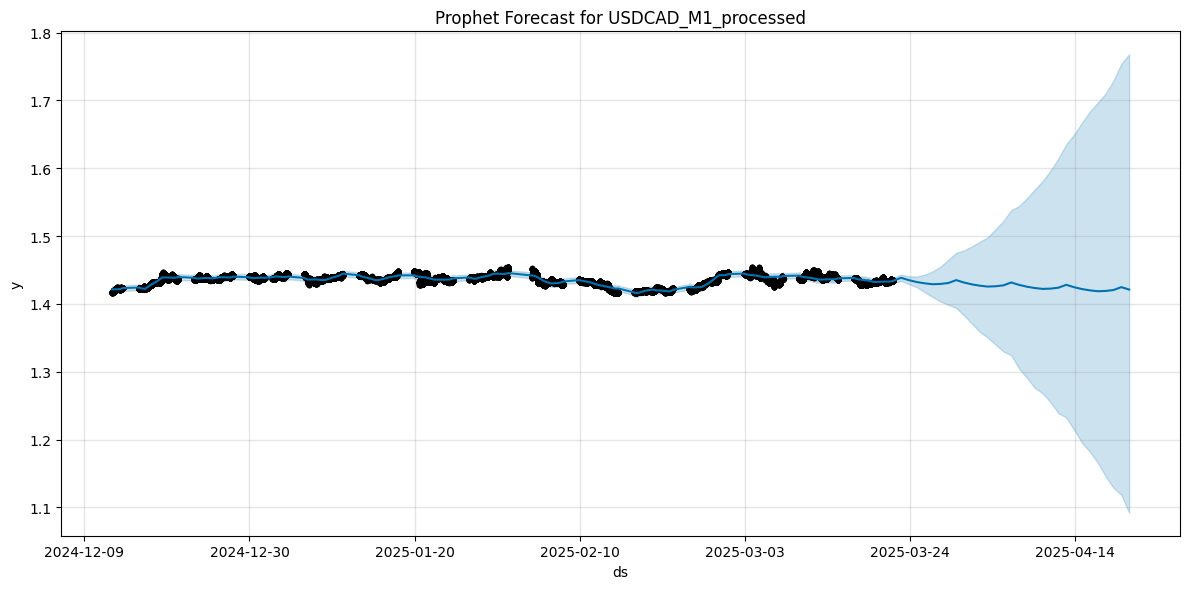


--- CROSS-VALIDATION RESULTS ---

Short Dataset - Easy:
  Setup: initial=20 days, period=7 days, horizon=7 days


  0%|          | 0/11 [00:00<?, ?it/s]01:10:28 - cmdstanpy - INFO - Chain [1] start processing
01:10:36 - cmdstanpy - INFO - Chain [1] done processing
  9%|▉         | 1/11 [00:09<01:30,  9.06s/it]01:10:37 - cmdstanpy - INFO - Chain [1] start processing
01:10:47 - cmdstanpy - INFO - Chain [1] done processing
 18%|█▊        | 2/11 [00:20<01:34, 10.52s/it]01:10:48 - cmdstanpy - INFO - Chain [1] start processing
01:11:02 - cmdstanpy - INFO - Chain [1] done processing
 27%|██▋       | 3/11 [00:35<01:41, 12.67s/it]01:11:04 - cmdstanpy - INFO - Chain [1] start processing
01:11:15 - cmdstanpy - INFO - Chain [1] done processing
 36%|███▋      | 4/11 [00:48<01:29, 12.79s/it]01:11:17 - cmdstanpy - INFO - Chain [1] start processing
01:46:45 - cmdstanpy - INFO - Chain [1] done processing
 45%|████▌     | 5/11 [36:18<1:17:36, 776.08s/it]01:59:55 - cmdstanpy - INFO - Chain [1] start processing
02:31:08 - cmdstanpy - INFO - Chain [1] done processing
 55%|█████▍    | 6/11 [1:20:41<1:58:08, 1417.70s/it

  MAPE: 0.0097 (0.97%)
  SMAPE: 0.0096
  Coverage: 0.671
  💭 Very low error on easy test - check harder tests

Short Dataset - Harder:
  Setup: initial=30 days, period=10 days, horizon=15 days


  0%|          | 0/6 [00:00<?, ?it/s]04:09:58 - cmdstanpy - INFO - Chain [1] start processing
04:10:31 - cmdstanpy - INFO - Chain [1] done processing
 17%|█▋        | 1/6 [00:35<02:55, 35.02s/it]04:10:33 - cmdstanpy - INFO - Chain [1] start processing
04:11:35 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 2/6 [02:04<04:27, 66.80s/it]04:12:02 - cmdstanpy - INFO - Chain [1] start processing
04:30:22 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 3/6 [20:26<26:58, 539.64s/it]04:30:25 - cmdstanpy - INFO - Chain [1] start processing
04:32:25 - cmdstanpy - INFO - Chain [1] done processing
 67%|██████▋   | 4/6 [22:28<12:29, 374.87s/it]04:32:27 - cmdstanpy - INFO - Chain [1] start processing
04:51:02 - cmdstanpy - INFO - Chain [1] done processing
 83%|████████▎ | 5/6 [41:06<10:42, 642.72s/it]04:51:30 - cmdstanpy - INFO - Chain [1] start processing
05:10:29 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 6/6 [1:00:32<00:00, 605.44s/it]


  MAPE: 0.0123 (1.23%)
  SMAPE: 0.0123
  Coverage: 0.814
  ✅ Excellent performance on challenging test!

--- OVERFITTING CHECK ---
Performance degradation ratio: 1.27
✅ GOOD generalization - consistent performance

--- RECOMMENDATIONS FOR USDCAD_M1_processed ---
📅 Moderate data (99 days) - reasonable for basic forecasting
💡 More data would allow for more rigorous testing

SUMMARY: The key insight is whether performance degrades significantly
as we make the cross-validation more challenging. If your 2% error
jumps to 15%+ on harder tests, that indicates overfitting.


In [9]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

def adaptive_prophet_analysis(name, file):
    """Run Prophet with CV parameters adapted to your data size"""
    
    if 'Time' not in file.columns:
        print(f"Error: No date column found in {name} dataset")
        return

    df_prophet = pd.DataFrame({
        'ds': pd.to_datetime(file["Time"]),
        'y': pd.to_numeric(file["Close"], errors='coerce')
    }).dropna().sort_values('ds').reset_index(drop=True)
    
    total_days = (df_prophet['ds'].max() - df_prophet['ds'].min()).days
    data_points = len(df_prophet)
    
    print(f"\n{'='*60}")
    print(f"PROPHET ANALYSIS FOR {name}")
    print(f"{'='*60}")
    print(f"Data points: {data_points}")
    print(f"Total days span: {total_days}")
    print(f"Date range: {df_prophet['ds'].min().date()} to {df_prophet['ds'].max().date()}")

    if total_days < 60:
        cv_configs = [
            {'name': 'Only Possible Setup', 'initial': '15 days', 'period': '5 days', 'horizon': '5 days'}
        ]
        print(f"⚠️  Limited data - only basic CV possible")
    elif total_days < 120:
        cv_configs = [
            {'name': 'Short Dataset - Easy', 'initial': '20 days', 'period': '7 days', 'horizon': '7 days'},
            {'name': 'Short Dataset - Harder', 'initial': '30 days', 'period': '10 days', 'horizon': '15 days'}
        ]
    elif total_days < 200:
        cv_configs = [
            {'name': 'Your Current (Easy)', 'initial': '20 days', 'period': '10 days', 'horizon': '10 days'},
            {'name': 'Moderate Test', 'initial': '40 days', 'period': '15 days', 'horizon': '20 days'},
            {'name': 'Challenging Test', 'initial': '60 days', 'period': '20 days', 'horizon': '30 days'}
        ]
    else:
        cv_configs = [
            {'name': 'Easy Test', 'initial': '30 days', 'period': '15 days', 'horizon': '15 days'},
            {'name': 'Moderate Test', 'initial': '60 days', 'period': '20 days', 'horizon': '30 days'},
            {'name': 'Rigorous Test', 'initial': '90 days', 'period': '30 days', 'horizon': '45 days'}
        ]

    print(f"\nFitting Prophet model...")
    model = Prophet(
        daily_seasonality=False,
        weekly_seasonality=True if total_days > 30 else False,
        yearly_seasonality=True if total_days > 200 else False
    )
    model.fit(df_prophet)

    future = model.make_future_dataframe(periods=30)
    forecast = model.predict(future)
 
    fig = model.plot(forecast, figsize=(12, 6))
    plt.title(f"Prophet Forecast for {name}")
    plt.tight_layout()
    plt.show()
    
    print(f"\n--- CROSS-VALIDATION RESULTS ---")
    
    results = []
    
    for config in cv_configs:
        try:
            print(f"\n{config['name']}:")
            print(f"  Setup: initial={config['initial']}, period={config['period']}, horizon={config['horizon']}")
            
            df_cross = cross_validation(
                model=model,
                initial=config['initial'],
                period=config['period'], 
                horizon=config['horizon']
            )
            
            df_performance = performance_metrics(df_cross)
            
            avg_mape = df_performance['mape'].mean()
            avg_smape = df_performance['smape'].mean() 
            avg_coverage = df_performance['coverage'].mean()
            
            results.append({
                'config': config['name'],
                'mape': avg_mape,
                'smape': avg_smape,
                'coverage': avg_coverage
            })
            
            print(f"  MAPE: {avg_mape:.4f} ({avg_mape*100:.2f}%)")
            print(f"  SMAPE: {avg_smape:.4f}")
            print(f"  Coverage: {avg_coverage:.3f}")

            if config['name'].endswith('Easy') or config['name'].endswith('(Easy)'):
                if avg_mape < 0.05:
                    print(f"  💭 Very low error on easy test - check harder tests")
                else:
                    print(f"  📊 Reasonable performance on easy test")
            else:
                if avg_mape < 0.10:
                    print(f"  ✅ Excellent performance on challenging test!")
                elif avg_mape < 0.20:
                    print(f"  👍 Good performance")
                elif avg_mape < 0.40:
                    print(f"  📈 Moderate performance")
                else:
                    print(f"  📉 Poor performance")
                
        except Exception as e:
            print(f"  ❌ Failed: {str(e)}")
            if "initial" in str(e).lower() or "period" in str(e).lower():
                print(f"     Not enough data - try smaller parameters")

    if len(results) > 1:
        print(f"\n--- OVERFITTING CHECK ---")
        easy_mape = results[0]['mape']
        hard_mape = results[-1]['mape']
        
        if len(results) > 1:
            ratio = hard_mape / easy_mape if easy_mape > 0 else float('inf')
            print(f"Performance degradation ratio: {ratio:.2f}")
            
            if ratio > 3.0:
                print(f"🚨 HIGH overfitting risk - performance drops {ratio:.1f}x on harder test")
            elif ratio > 2.0:
                print(f"⚠️  MODERATE overfitting - performance drops {ratio:.1f}x")
            elif ratio > 1.5:
                print(f"⚡ SLIGHT overfitting - performance drops {ratio:.1f}x")
            else:
                print(f"✅ GOOD generalization - consistent performance")

    print(f"\n--- RECOMMENDATIONS FOR {name} ---")
    if total_days < 90:
        print(f"📅 Limited data ({total_days} days) - results should be interpreted cautiously")
        print(f"💡 Consider collecting more historical data for robust evaluation")
    elif total_days < 200:
        print(f"📅 Moderate data ({total_days} days) - reasonable for basic forecasting")
        print(f"💡 More data would allow for more rigorous testing")
    else:
        print(f"📅 Good data coverage ({total_days} days) - results are more reliable")
    
    return model, forecast, results

for name, file in pd_dfs.items():
    try:
        model, forecast, results = adaptive_prophet_analysis(name, file)
    except Exception as e:
        print(f"Error processing {name}: {e}")

print(f"\n{'='*60}")
print("SUMMARY: The key insight is whether performance degrades significantly")
print("as we make the cross-validation more challenging. If your 2% error")
print("jumps to 15%+ on harder tests, that indicates overfitting.")
print(f"{'='*60}")

### 4. Expand the model with regressors

Index(['Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'MA5', 'MA20',
       'MA20_std', 'BB_upper', 'BB_lower', 'Price_Change', 'Price_Change_Pct',
       'Daily_Range', 'Daily_Range_Pct', 'True_Range', 'ATR14', 'RSI14',
       'EMA12', 'EMA26', 'MACD', 'MACD_Signal', 'MACD_Hist'],
      dtype='object')


05:30:34 - cmdstanpy - INFO - Chain [1] start processing
05:50:04 - cmdstanpy - INFO - Chain [1] done processing


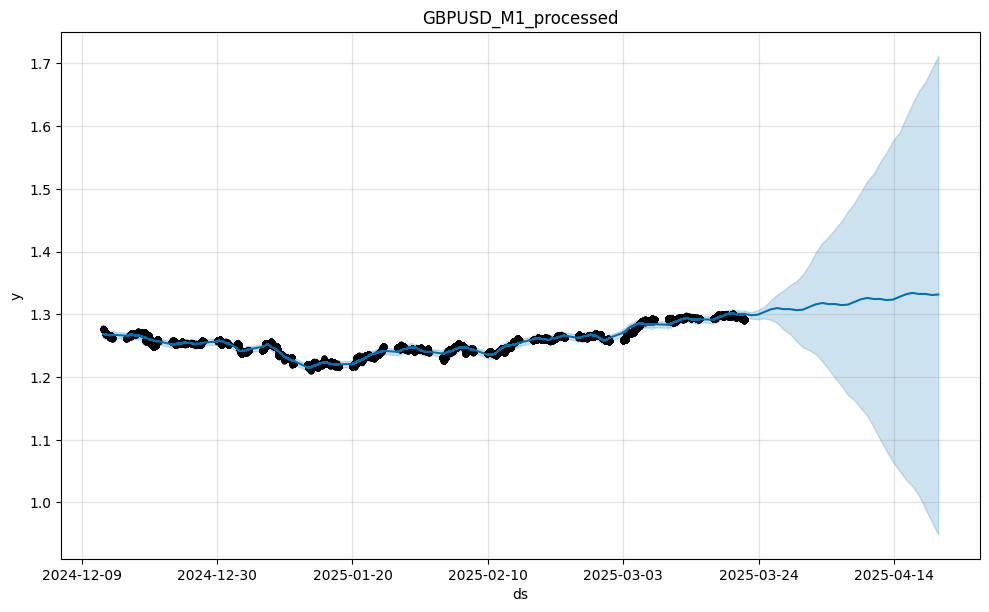

Index(['Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'MA5', 'MA20',
       'MA20_std', 'BB_upper', 'BB_lower', 'Price_Change', 'Price_Change_Pct',
       'Daily_Range', 'Daily_Range_Pct', 'True_Range', 'ATR14', 'RSI14',
       'EMA12', 'EMA26', 'MACD', 'MACD_Signal', 'MACD_Hist'],
      dtype='object')


06:01:05 - cmdstanpy - INFO - Chain [1] start processing
07:08:55 - cmdstanpy - INFO - Chain [1] done processing


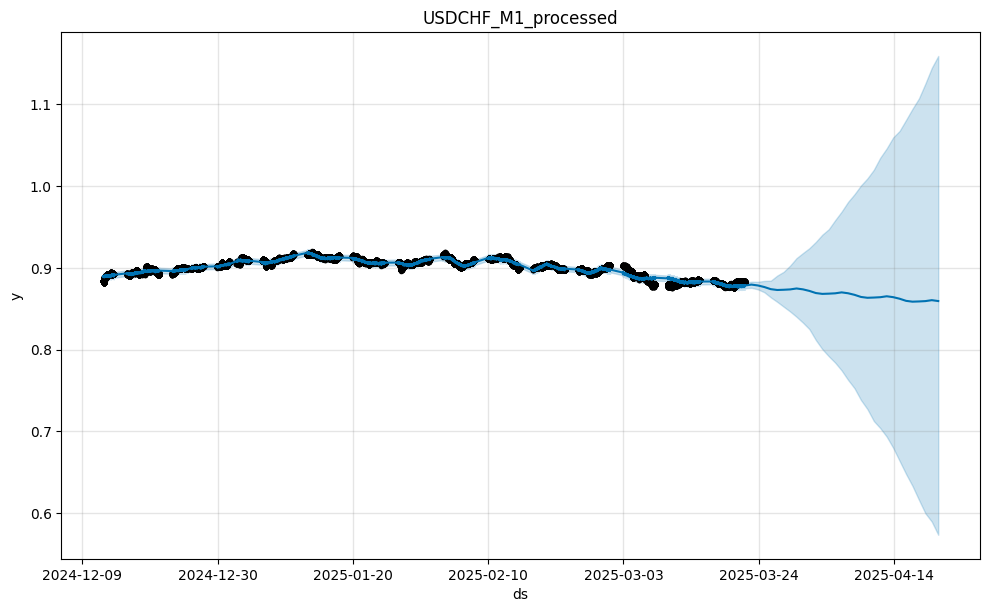

Index(['Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'MA5', 'MA20',
       'MA20_std', 'BB_upper', 'BB_lower', 'Price_Change', 'Price_Change_Pct',
       'Daily_Range', 'Daily_Range_Pct', 'True_Range', 'ATR14', 'RSI14',
       'EMA12', 'EMA26', 'MACD', 'MACD_Signal', 'MACD_Hist'],
      dtype='object')


07:09:03 - cmdstanpy - INFO - Chain [1] start processing
07:09:27 - cmdstanpy - INFO - Chain [1] done processing


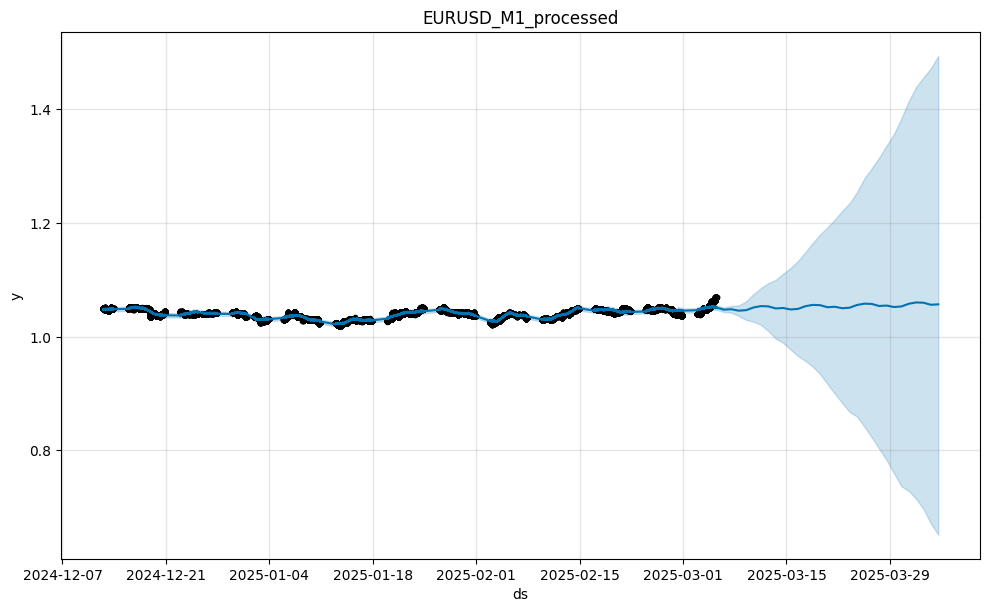

Index(['Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'MA5', 'MA20',
       'MA20_std', 'BB_upper', 'BB_lower', 'Price_Change', 'Price_Change_Pct',
       'Daily_Range', 'Daily_Range_Pct', 'True_Range', 'ATR14', 'RSI14',
       'EMA12', 'EMA26', 'MACD', 'MACD_Signal', 'MACD_Hist'],
      dtype='object')


07:09:34 - cmdstanpy - INFO - Chain [1] start processing
07:10:05 - cmdstanpy - INFO - Chain [1] done processing


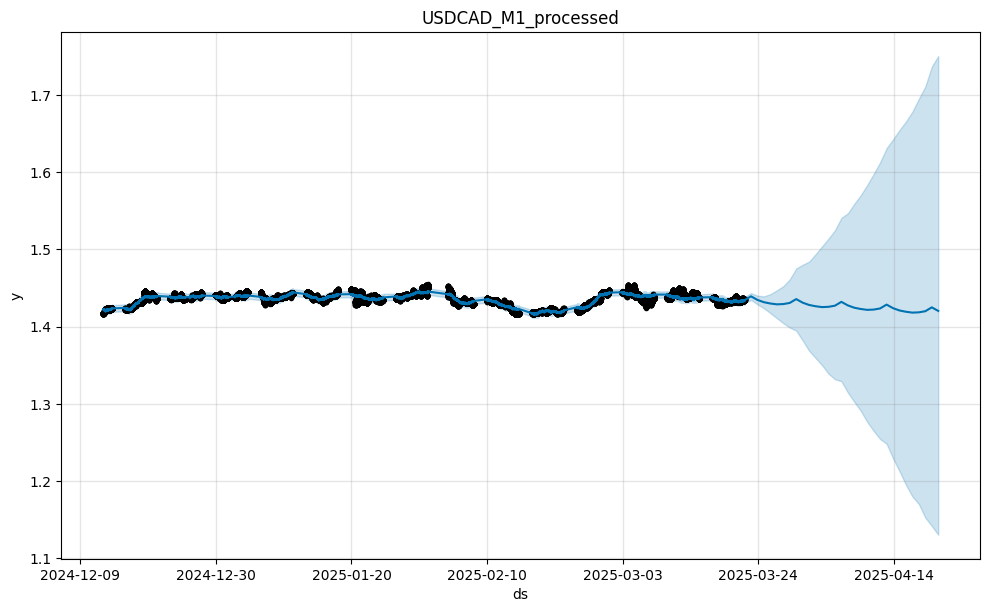

In [10]:
### lets see if adding more regressors can improve the accuracy of the model
### only adding ATR14 attribute did not changed anything for the model

for name, file in pd_dfs.items():
    if "Time" in file.columns:
        print(file.columns)
        model_df = pd.DataFrame({
            "ds": pd.to_datetime(file["Time"]),
            "y": file["Close"],
            "ATR14": file["ATR14"]
        })
        model = Prophet()

        model.add_regressor("ATR14")

        model.fit(model_df)

        future = model.make_future_dataframe(periods=30)

        last_atr = file["ATR14"].iloc[-1]
        future = future.merge(model_df[["ds", "ATR14"]], on="ds", how="left")
        future["ATR14"] = future["ATR14"].fillna(method="ffill").fillna(last_atr)
        forecast = model.predict(future)

        fig = model.plot(forecast)
        plt.title(f"{name}")
        plt.show()
    else:
        print("Error")

Index(['Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'MA5', 'MA20',
       'MA20_std', 'BB_upper', 'BB_lower', 'Price_Change', 'Price_Change_Pct',
       'Daily_Range', 'Daily_Range_Pct', 'True_Range', 'ATR14', 'RSI14',
       'EMA12', 'EMA26', 'MACD', 'MACD_Signal', 'MACD_Hist'],
      dtype='object')


07:10:13 - cmdstanpy - INFO - Chain [1] start processing
07:10:51 - cmdstanpy - INFO - Chain [1] done processing


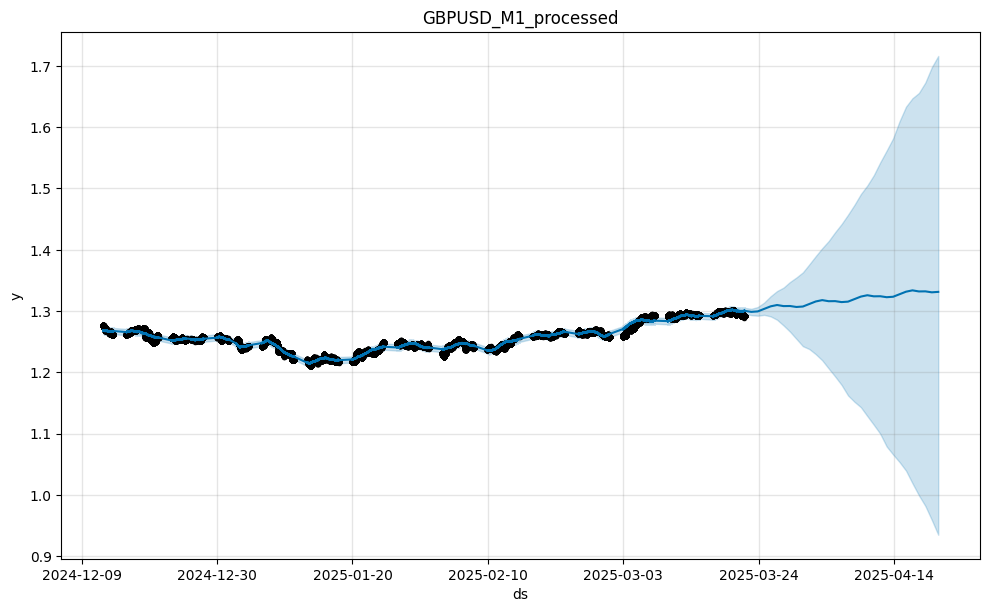

Index(['Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'MA5', 'MA20',
       'MA20_std', 'BB_upper', 'BB_lower', 'Price_Change', 'Price_Change_Pct',
       'Daily_Range', 'Daily_Range_Pct', 'True_Range', 'ATR14', 'RSI14',
       'EMA12', 'EMA26', 'MACD', 'MACD_Signal', 'MACD_Hist'],
      dtype='object')


07:10:58 - cmdstanpy - INFO - Chain [1] start processing
07:11:45 - cmdstanpy - INFO - Chain [1] done processing


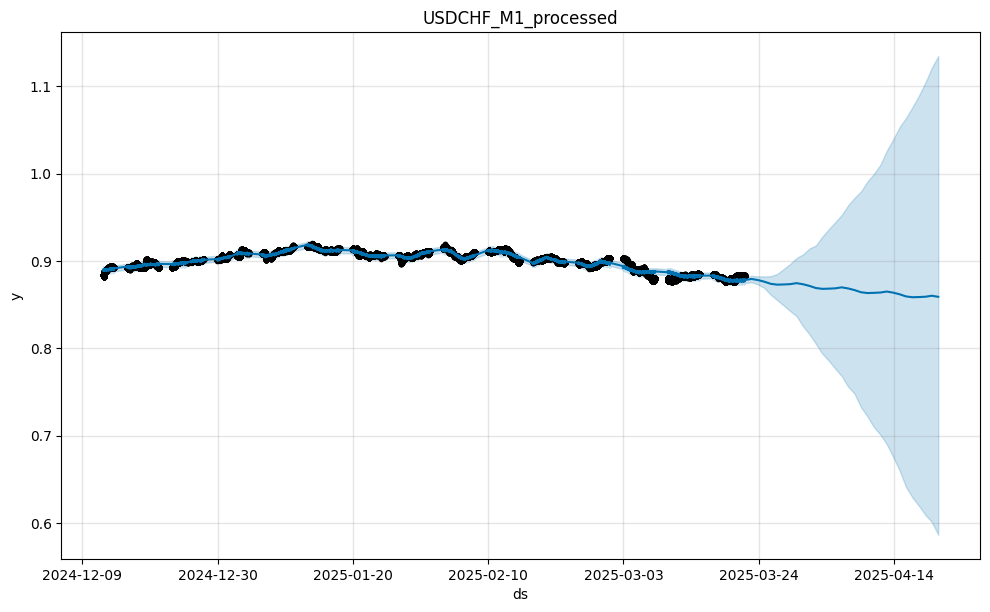

Index(['Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'MA5', 'MA20',
       'MA20_std', 'BB_upper', 'BB_lower', 'Price_Change', 'Price_Change_Pct',
       'Daily_Range', 'Daily_Range_Pct', 'True_Range', 'ATR14', 'RSI14',
       'EMA12', 'EMA26', 'MACD', 'MACD_Signal', 'MACD_Hist'],
      dtype='object')


07:11:53 - cmdstanpy - INFO - Chain [1] start processing
07:12:25 - cmdstanpy - INFO - Chain [1] done processing


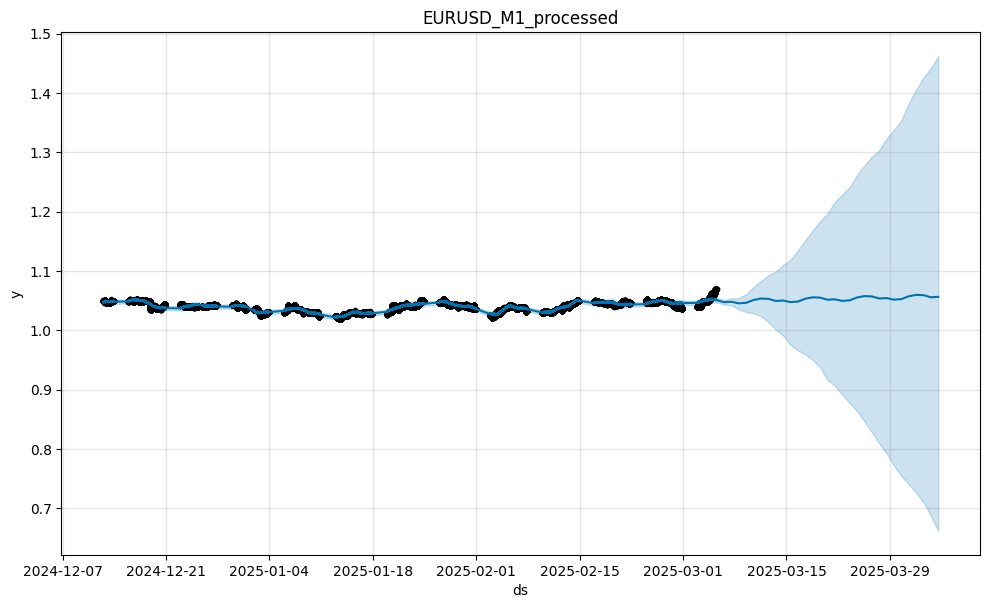

Index(['Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'MA5', 'MA20',
       'MA20_std', 'BB_upper', 'BB_lower', 'Price_Change', 'Price_Change_Pct',
       'Daily_Range', 'Daily_Range_Pct', 'True_Range', 'ATR14', 'RSI14',
       'EMA12', 'EMA26', 'MACD', 'MACD_Signal', 'MACD_Hist'],
      dtype='object')


07:12:32 - cmdstanpy - INFO - Chain [1] start processing
07:13:15 - cmdstanpy - INFO - Chain [1] done processing


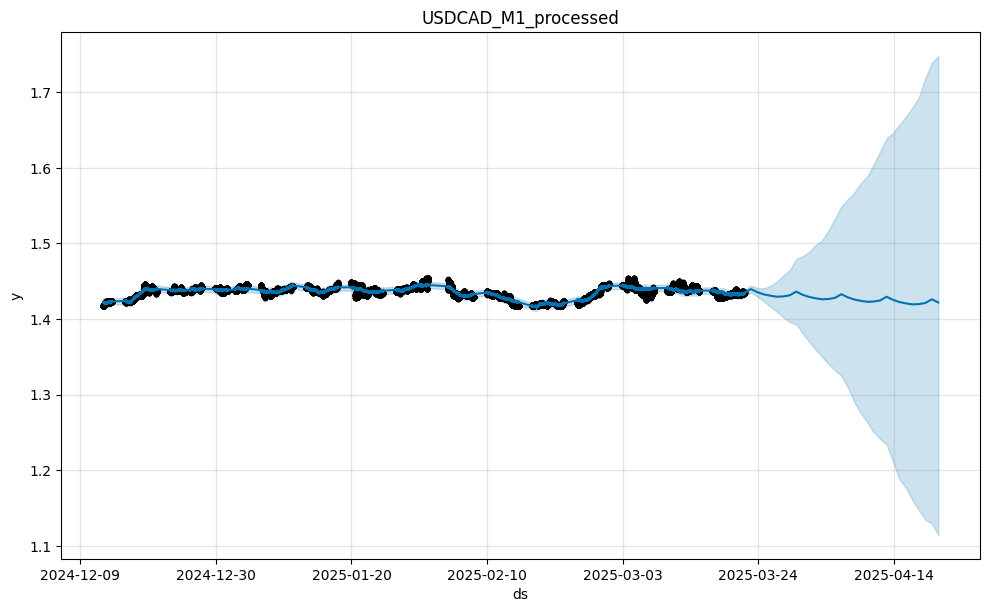

In [11]:
for name, file in pd_dfs.items():
    if "Time" in file.columns:
        print(file.columns)
        model_df = pd.DataFrame({
            "ds": pd.to_datetime(file["Time"]),
            "y": file["Close"],
            "ATR14": file["ATR14"],
            "Volume": file["Volume"]
        })
        model = Prophet()

        model.add_regressor("ATR14")
        model.add_regressor("Volume")

        model.fit(model_df)

        future = model.make_future_dataframe(periods=30)

        last_atr = file["ATR14"].iloc[-1]
        future = future.merge(model_df[["ds", "ATR14"]], on="ds", how="left")
        future["ATR14"] = future["ATR14"].fillna(method="ffill").fillna(last_atr)

        last_atr2 = file["Volume"].iloc[-1]
        future = future.merge(model_df[["ds", "Volume"]], on="ds", how="left")
        future["Volume"] = future["Volume"].fillna(method="ffill").fillna(last_atr2)

        forecast = model.predict(future)

        fig = model.plot(forecast)
        plt.title(f"{name}")
        plt.show()
    else:
        print("Error")


Checking GBPUSD_M1_processed for problematic values:
ATR14: inf=0, NaN=0, min=0.0003114285714285, max=0.0229942857142857
RSI14: inf=60, NaN=0, min=-643399.9999962826, max=512399.9999966925
BB_upper: inf=0, NaN=0, min=1.2224953154792144, max=1.332909007395178
BB_lower: inf=0, NaN=0, min=1.1961267429979046, max=1.2972725291608442
Volume: inf=0, NaN=0, min=1, max=276
Price_Change: inf=0, NaN=0, min=-0.05495, max=0.0538800000000001


07:13:25 - cmdstanpy - INFO - Chain [1] start processing
07:14:18 - cmdstanpy - INFO - Chain [1] done processing


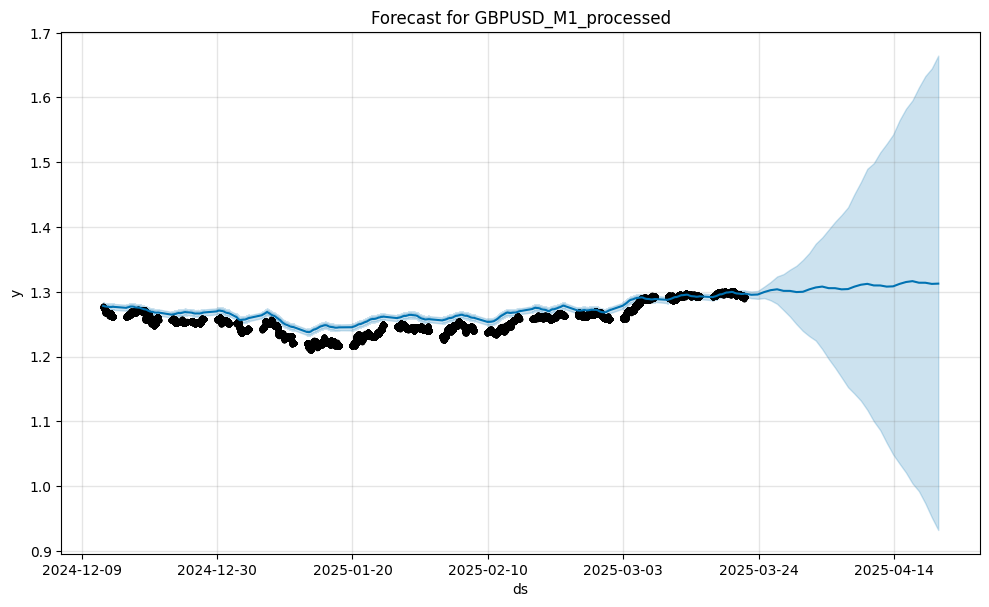


Checking USDCHF_M1_processed for problematic values:
ATR14: inf=0, NaN=0, min=0.0002028571428571, max=0.011205
RSI14: inf=64, NaN=0, min=-542100.0000025136, max=447100.00000185665
BB_upper: inf=0, NaN=0, min=0.8793034987402046, max=0.9283347179476724
BB_lower: inf=0, NaN=0, min=0.8635367458909202, max=0.9153348875080062
Volume: inf=0, NaN=0, min=1, max=212
Price_Change: inf=0, NaN=0, min=-0.0341, max=0.0325699999999999


07:14:26 - cmdstanpy - INFO - Chain [1] start processing
07:15:13 - cmdstanpy - INFO - Chain [1] done processing


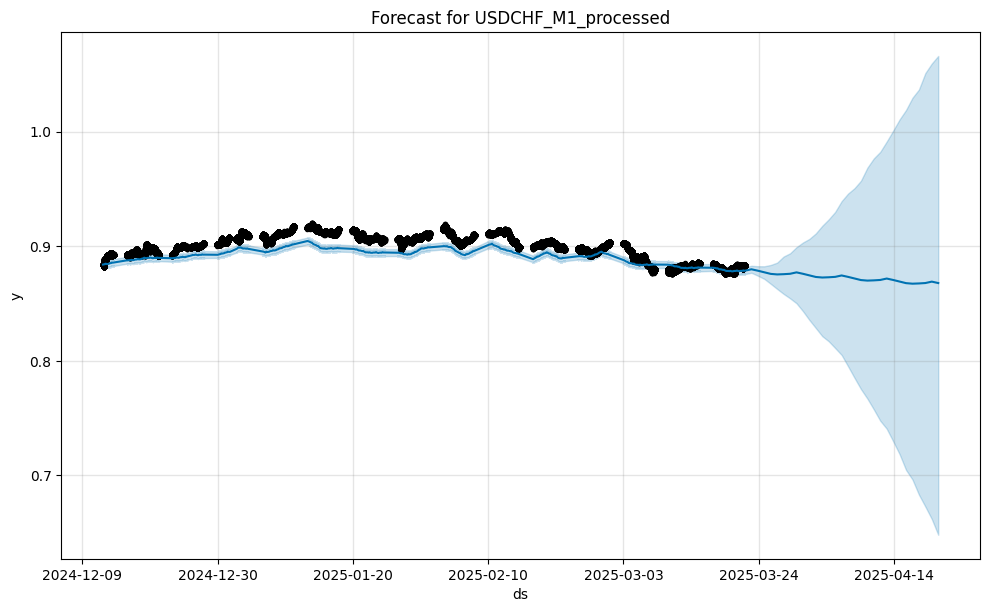


Checking EURUSD_M1_processed for problematic values:
ATR14: inf=0, NaN=0, min=0.0002271428571428, max=0.0121357142857142
RSI14: inf=58, NaN=0, min=-563299.9999963315, max=297899.9999980272
BB_upper: inf=0, NaN=0, min=1.0266702638236525, max=1.07473162488227
BB_lower: inf=0, NaN=0, min=1.0134097982614525, max=1.0495559848909877
Volume: inf=0, NaN=0, min=1, max=370
Price_Change: inf=0, NaN=0, min=-0.0268600000000001, max=0.02895


07:15:21 - cmdstanpy - INFO - Chain [1] start processing
07:15:54 - cmdstanpy - INFO - Chain [1] done processing


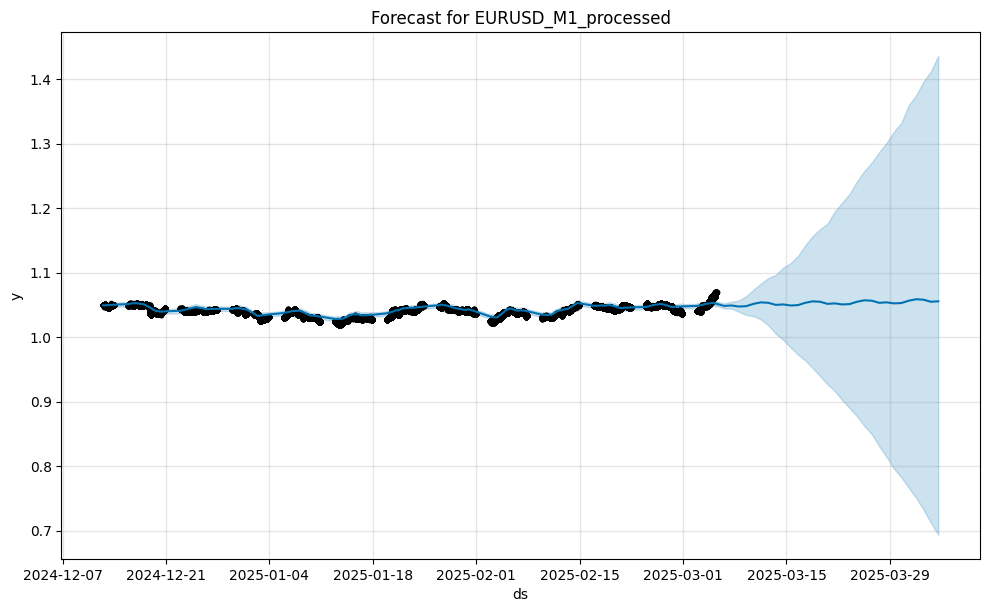


Checking USDCAD_M1_processed for problematic values:
ATR14: inf=0, NaN=0, min=0.0002435714285714, max=0.0135092857142857
RSI14: inf=45, NaN=0, min=-457199.99999685737, max=372100.00000586925
BB_upper: inf=0, NaN=0, min=1.419323533699951, max=1.461261626679856
BB_lower: inf=0, NaN=0, min=1.4077977164854962, max=1.443115135801872
Volume: inf=0, NaN=0, min=1, max=324
Price_Change: inf=0, NaN=0, min=-0.0298199999999999, max=0.02522


07:16:01 - cmdstanpy - INFO - Chain [1] start processing
07:16:53 - cmdstanpy - INFO - Chain [1] done processing


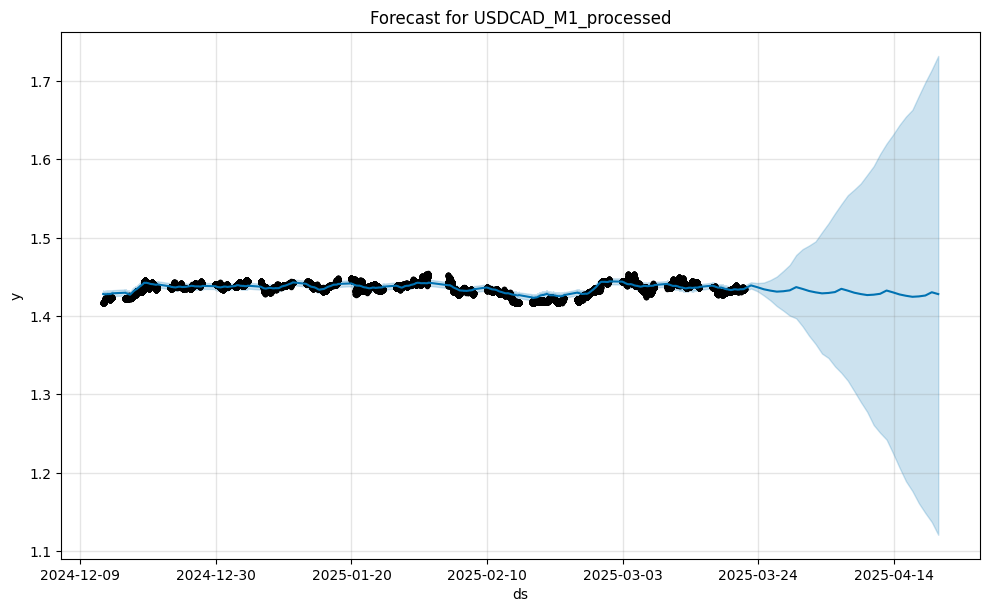

In [12]:
from sklearn.preprocessing import StandardScaler

for name, file in pd_dfs.items():
    if "Time" in file.columns:
        try:
            regressors = ["ATR14", "RSI14", "BB_upper", "BB_lower", "Volume", "Price_Change"]
            
            print(f"\nChecking {name} for problematic values:")
            for col in regressors:
                inf_count = np.isinf(file[col]).sum()
                nan_count = file[col].isna().sum()
                max_val = file[col].replace([np.inf, -np.inf], np.nan).max()
                min_val = file[col].replace([np.inf, -np.inf], np.nan).min()
                print(f"{col}: inf={inf_count}, NaN={nan_count}, min={min_val}, max={max_val}")

            clean_file = file.copy()

            for col in regressors:
                clean_file[col] = clean_file[col].replace([np.inf, -np.inf], np.nan)

            for col in regressors:
                median_val = clean_file[col].median()
                clean_file[col] = clean_file[col].fillna(median_val)

            scaler = StandardScaler()
            scaled_features = scaler.fit_transform(clean_file[regressors])
            scaled_features_df = pd.DataFrame(scaled_features, columns=regressors)

            model_df = pd.DataFrame({
                "ds": pd.to_datetime(clean_file["Time"]),
                "y": clean_file["Close"]
            })

            for col in regressors:
                model_df[col] = scaled_features_df[col].values

            model = Prophet(changepoint_prior_scale=0.01)
            
            for col in regressors:
                model.add_regressor(col, standardize=False)
                
            model.fit(model_df)

            future = model.make_future_dataframe(periods=30)
            
            for col in regressors:
                future[col] = model_df[col].iloc[-1]
            
            forecast = model.predict(future)
            
            fig = model.plot(forecast)
            plt.title(f"Forecast for {name}")
            plt.show()
            
        except Exception as e:
            print(f"Error processing {name}: {e}")